# **Thompson Sampling**

Name: Seanrei Ethan M. Valdeabella

Date: February 4, 2025

In [128]:
#@title Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
#@title Importing the dataset

dataset_name = "Ads_CTR_Optimisation.csv" #@param {type:"string"}
dataset = pd.read_csv(dataset_name)

In [130]:
#@title Implementing the Thompson Sampling
import random

N = 10_000
d = 10
ads_selected = []  # All the ads that were selected
number_of_rewards_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
number_of_rewards_0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_rewards = []

for n in range(0, N):
  ad = 0
  max_random_draw = 0

  for i in range(0, d):
    random_draw = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_draw > max_random_draw:
      max_random_draw = random_draw
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_rewards += reward


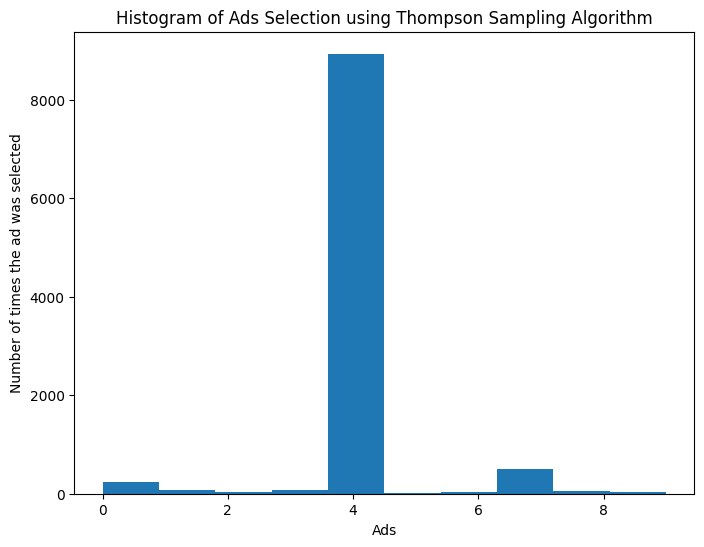

In [131]:
#@title Visualizing the results
plt.figure(figsize=(8, 6))
plt.hist(ads_selected)
plt.title("Histogram of Ads Selection using Thompson Sampling Algorithm")
plt.xlabel("Ads")
plt.ylabel("Number of times the ad was selected")
plt.show()